In [6]:
import pandas
pandas.__version__

'1.3.4'

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np

import networkx as nx #plot data as graph
import matplotlib.pyplot as plt #use this to make spring layout graph
import cartopy.crs as ccrs #project this onto map of the USA
import cartopy.feature as cfeature

In [8]:
#1.-----------------------------------------------------Get data from UL
URL1 = "https://vega.github.io/vega/data/airports.csv"
URL2 = "https://vega.github.io/vega/data/flights-airport.csv"
airports = pd.read_csv(URL1)
routes = pd.read_csv(URL2)

#Save  data from as CSV
airports.to_csv('my_path\\airports.csv',index=False, header=True)
routes.to_csv('my_path\\routes.csv',index=False, header=True)

In [9]:
airports = pd.read_csv('my_path\\airports.csv')
flights = pd.read_csv('my_path\\routes.csv')

In [10]:
airports

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [11]:
flights

,origin,destination,count
0,ABE,ATL,853
1,ABE,BHM,1
2,ABE,CLE,805
3,ABE,CLT,465
4,ABE,CVG,247
...,...,...,...
5361,YUM,IPL,326
5362,YUM,LAS,99
5363,YUM,LAX,1044
5364,YUM,PHX,1961


In [12]:
airports['iata'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3371    False
3372    False
3373    False
3374    False
3375    False
Name: iata, Length: 3376, dtype: bool

extra commands - would need to change dataframe name back to df

In [13]:
airports.describe()

,latitude,longitude
count,3376.000000,3376.000000
mean,40.036524,-98.621205
std,8.329559,22.869458
min,7.367222,-176.646031
25%,34.688427,-108.761121
50%,39.434449,-93.599425
75%,43.372612,-84.137519
max,71.285448,145.621384


In [14]:
airports.shape

(3376, 7)

we want to check if the flights 'origin' and destination have the same codes as iata. no rouge airports in airport and flight data frame so they don't appear twice. Append them together so they appear in one set that has unique values. 

In [15]:
origin = flights['origin'].unique()
destination = flights['destination'].unique()
flights_set = set(np.append(origin,destination))
airports_set = set(airports['iata'])
flights_set.issubset(airports_set)

True

we will insert the names of the airports into the flights table

This will be the table we builf the graph. The 'iata' codes are the vertices and the 'origin' and destination will be the edges. Remeber an edge goes from a vertex to another vertex

In [16]:
val = airports['iata'].to_list()
val
indx = pd.Index(val)
indx

Index(['00M', '00R', '00V', '01G', '01J', '01M', '02A', '02C', '02G', '03D',
       ...
       'Z55', 'Z73', 'Z84', 'Z91', 'Z95', 'ZEF', 'ZER', 'ZPH', 'ZUN', 'ZZV'],
      dtype='object', length=3376)

In [17]:
flights.insert(1, 'Name Origin', airports.loc[indx.get_indexer(flights['origin']), 'name'].values)
flights.insert(3, 'Name Destination', airports.loc[indx.get_indexer(flights['destination']), 'name'].values)
flights
flights.to_csv('new_flights.csv', index=False, header=True)

In [18]:
flights

,origin,Name Origin,destination,Name Destination,count
0,ABE,Lehigh Valley International,ATL,William B Hartsfield-Atlanta Intl,853
1,ABE,Lehigh Valley International,BHM,Birmingham International,1
2,ABE,Lehigh Valley International,CLE,Cleveland-Hopkins Intl,805
3,ABE,Lehigh Valley International,CLT,Charlotte/Douglas International,465
4,ABE,Lehigh Valley International,CVG,Cincinnati Northern Kentucky Intl,247
...,...,...,...,...,...
5361,YUM,Yuma MCAS-Yuma International,IPL,Imperial County,326
5362,YUM,Yuma MCAS-Yuma International,LAS,McCarran International,99
5363,YUM,Yuma MCAS-Yuma International,LAX,Los Angeles International,1044
5364,YUM,Yuma MCAS-Yuma International,PHX,Phoenix Sky Harbor International,1961


Airport has a unique identifier which is an IATA code, actors are our airports and relations are the routes between the airports. vertex (single point in graph) can be airport (iata number), edges (are pairs) of vertices (origin, destination)

In [19]:
G = nx.from_pandas_edgelist(flights,
                           source='origin',
                           target='destination',
                           edge_attr ='count',
                           create_using=nx.Graph())

nx.info(G)

'Graph with 305 nodes and 2834 edges'

Connected components

In [20]:
sg = next(G.subgraph(c) for c in nx.connected_components(G))

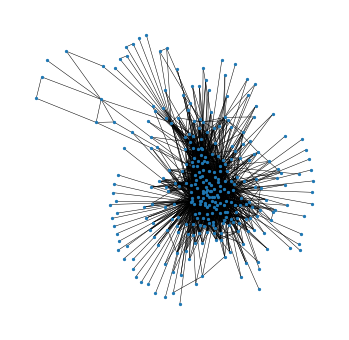

In [21]:
#nx.draw_network(G)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                node_size=5, width=.5)
ax.set_axis_off()

In [22]:
pos = {}

for index, row in airports.iterrows() :
    #check for repeats
    if not row['iata'] in airports:
        pos[row['iata']] = (row['longitude'], row['latitude'])

In [23]:
pos

{'00M': (-89.23450472, 31.95376472),
 '00R': (-95.01792778, 30.68586111),
 '00V': (-104.5698933, 38.94574889),
 '01G': (-78.05208056, 42.74134667),
 '01J': (-81.90594389, 30.6880125),
 '01M': (-88.20111111, 34.49166667),
 '02A': (-86.61145333, 32.85048667),
 '02C': (-88.17786917, 43.08751),
 '02G': (-80.64140639, 40.67331278),
 '03D': (-92.22696056, 40.44725889),
 '04M': (-89.34285194, 33.93011222),
 '04Y': (-96.35089861, 46.88384889),
 '05C': (-87.40109333, 41.51961917),
 '05F': (-97.79696778, 31.42127556),
 '05U': (-116.0050597, 39.60416667),
 '06A': (-85.68003611, 32.46047167),
 '06C': (-88.10124278, 41.98934083),
 '06D': (-99.62087694, 48.88434111),
 '06M': (-89.31256917, 33.53456583),
 '06N': (-74.39191722, 41.43156583),
 '06U': (-114.6580911, 41.97602222),
 '07C': (-85.06433333, 41.30716667),
 '07F': (-94.97174556, 32.52883861),
 '07G': (-84.81143139, 42.57450861),
 '07K': (-98.05033639, 41.11668056),
 '08A': (-86.32822139, 32.52943944),
 '08D': (-102.4063514, 48.30079861),
 '08K

look at degrees of vertices

In [24]:
deg = nx.degree(sg)
sizes =  [5 * deg[iata] for iata in sg.nodes]

In [25]:
deg

DegreeView({'ABE': 12, 'ATL': 173, 'BHM': 35, 'CLE': 76, 'CLT': 84, 'CVG': 113, 'DTW': 119, 'JFK': 72, 'LGA': 67, 'ORD': 150, 'PHL': 63, 'ABI': 2, 'DFW': 134, 'ABQ': 41, 'AMA': 8, 'AUS': 55, 'BWI': 67, 'DAL': 18, 'DEN': 127, 'ELP': 18, 'EWR': 93, 'HOU': 34, 'IAD': 71, 'IAH': 114, 'LAS': 91, 'LAX': 91, 'LBB': 8, 'MAF': 7, 'MCI': 54, 'MCO': 90, 'MDW': 54, 'MSP': 127, 'OAK': 34, 'OKC': 32, 'ONT': 36, 'PDX': 45, 'PHX': 88, 'SAN': 55, 'SAT': 44, 'SEA': 56, 'SFO': 74, 'SLC': 115, 'SMF': 38, 'STL': 53, 'TPA': 63, 'TUL': 33, 'TUS': 33, 'ABY': 1, 'ACK': 3, 'ACT': 1, 'ACV': 6, 'CEC': 2, 'MRY': 14, 'SJC': 31, 'ACY': 3, 'ADK': 1, 'ANC': 29, 'ADQ': 1, 'AEX': 3, 'AGS': 4, 'AKN': 2, 'DLG': 2, 'ALB': 19, 'BOS': 69, 'DCA': 56, 'FLL': 58, 'SBN': 6, 'ALO': 1, 'BET': 1, 'CDV': 2, 'FAI': 6, 'HNL': 24, 'JNU': 7, 'OGG': 18, 'OME': 2, 'OTZ': 2, 'SCC': 3, 'ASE': 11, 'GJT': 15, 'MSN': 22, 'RFD': 5, 'ATW': 14, 'AVL': 7, 'AVP': 10, 'BDL': 36, 'BGR': 8, 'BMI': 6, 'BNA': 51, 'BOI': 22, 'BQK': 1, 'BTR': 10, 'BTV': 1

In [26]:
sizes

[60,
 865,
 175,
 380,
 420,
 565,
 595,
 360,
 335,
 750,
 315,
 10,
 670,
 205,
 40,
 275,
 335,
 90,
 635,
 90,
 465,
 170,
 355,
 570,
 455,
 455,
 40,
 35,
 270,
 450,
 270,
 635,
 170,
 160,
 180,
 225,
 440,
 275,
 220,
 280,
 370,
 575,
 190,
 265,
 315,
 165,
 165,
 5,
 15,
 5,
 30,
 10,
 70,
 155,
 15,
 5,
 145,
 5,
 15,
 20,
 10,
 10,
 95,
 345,
 280,
 290,
 30,
 5,
 5,
 10,
 30,
 120,
 35,
 90,
 10,
 10,
 15,
 55,
 75,
 110,
 25,
 70,
 35,
 50,
 180,
 40,
 30,
 255,
 110,
 5,
 50,
 70,
 110,
 55,
 50,
 70,
 35,
 15,
 90,
 60,
 195,
 140,
 20,
 45,
 5,
 45,
 85,
 5,
 135,
 65,
 35,
 5,
 10,
 10,
 35,
 5,
 60,
 60,
 15,
 30,
 5,
 35,
 90,
 15,
 100,
 95,
 65,
 5,
 25,
 55,
 5,
 70,
 75,
 105,
 25,
 205,
 45,
 45,
 65,
 210,
 10,
 80,
 15,
 105,
 5,
 5,
 5,
 70,
 5,
 395,
 15,
 30,
 90,
 245,
 275,
 10,
 50,
 15,
 25,
 215,
 40,
 55,
 10,
 155,
 155,
 140,
 20,
 30,
 50,
 190,
 45,
 110,
 65,
 230,
 110,
 125,
 40,
 90,
 180,
 90,
 15,
 150,
 70,
 30,
 115,
 130,
 80,
 60,
 25

In [27]:
labels = {iata: iata if deg[iata] >= 20 else ''
         for iata in sg.nodes}

In [28]:
labels

{'ABE': '',
 'ATL': 'ATL',
 'BHM': 'BHM',
 'CLE': 'CLE',
 'CLT': 'CLT',
 'CVG': 'CVG',
 'DTW': 'DTW',
 'JFK': 'JFK',
 'LGA': 'LGA',
 'ORD': 'ORD',
 'PHL': 'PHL',
 'ABI': '',
 'DFW': 'DFW',
 'ABQ': 'ABQ',
 'AMA': '',
 'AUS': 'AUS',
 'BWI': 'BWI',
 'DAL': '',
 'DEN': 'DEN',
 'ELP': '',
 'EWR': 'EWR',
 'HOU': 'HOU',
 'IAD': 'IAD',
 'IAH': 'IAH',
 'LAS': 'LAS',
 'LAX': 'LAX',
 'LBB': '',
 'MAF': '',
 'MCI': 'MCI',
 'MCO': 'MCO',
 'MDW': 'MDW',
 'MSP': 'MSP',
 'OAK': 'OAK',
 'OKC': 'OKC',
 'ONT': 'ONT',
 'PDX': 'PDX',
 'PHX': 'PHX',
 'SAN': 'SAN',
 'SAT': 'SAT',
 'SEA': 'SEA',
 'SFO': 'SFO',
 'SLC': 'SLC',
 'SMF': 'SMF',
 'STL': 'STL',
 'TPA': 'TPA',
 'TUL': 'TUL',
 'TUS': 'TUS',
 'ABY': '',
 'ACK': '',
 'ACT': '',
 'ACV': '',
 'CEC': '',
 'MRY': '',
 'SJC': 'SJC',
 'ACY': '',
 'ADK': '',
 'ANC': 'ANC',
 'ADQ': '',
 'AEX': '',
 'AGS': '',
 'AKN': '',
 'DLG': '',
 'ALB': '',
 'BOS': 'BOS',
 'DCA': 'DCA',
 'FLL': 'FLL',
 'SBN': '',
 'ALO': '',
 'BET': '',
 'CDV': '',
 'FAI': '',
 'HNL': 'HNL'

will be using cartopy

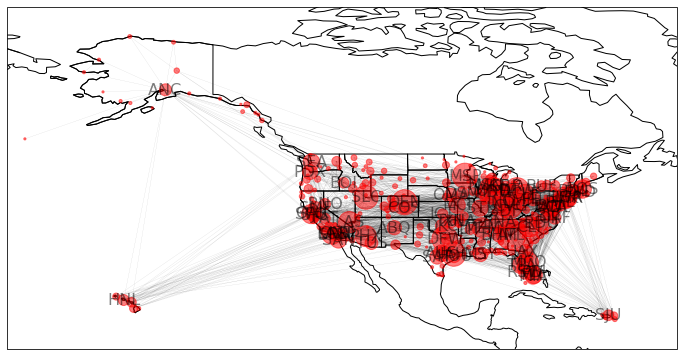

In [29]:
#Map projection
crs = ccrs.PlateCarree()   
fig, ax = plt.subplots(
    1, 1, figsize=(12, 8),
    subplot_kw=dict(projection=crs))
ax.coastlines()
#Extent of continental US.
#ax.set_extent([-128, -62, 20, 50])
ax.add_feature(cfeature.STATES)
nx.draw_networkx(sg, ax=ax,
                font_size=16,
                alpha=.5,
                width=.075,
                 node_size=sizes,
                labels=labels,
                pos=pos,
                node_color='red',
                cmap=plt.cm.autumn)

In [ ]:
fig.savefig('US-Flights.png')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.set_index('iata')

In [ ]:
df.head()

In [ ]:
df.set_index('iata',inplace=True)
df.head()

df loc allows you to locate your data in many ways

In [ ]:
df.loc['01J', 'state']

In [ ]:
df['state']

In [ ]:
df.reset_index()

In [ ]:
df.shape

In [ ]:
df.index

More pandas______

In [ ]:
my_dict = {'Name':['Fred','Rashid','Nathan','Alice'],
           'Age': [55,34,46,35],
           'Job': ['Data Scientist', 'Rock Star', 'Dustman','Cow Poke']}

my_df = pd.DataFrame(my_dict)
print(my_df)

In [ ]:
print(my_df.loc[1,'Job'])

In [ ]:
print(my_df.loc[3,'Job'])

In [ ]:
print(my_df.loc[0:2,'Age':'Job']) 

In [ ]:
print(my_df.loc[0,:])

In [ ]:
print(my_df.loc[:,'Name']) 

iloc works for integer values for row and column labels

In [ ]:
print(my_df.iloc[2,1])

Here we have chosen row 2 and column 1. DataFrame.iloc[] also works with the row and column slicing we did with DataFrame.iloc[] but we must remember to use integer indexes for the function to work.

In [ ]:
my_df['email'] = ['fred@email.com','Missing','nat@email.com','NA']
my_df.loc[1,'Age'] = np.NaN
print(my_df)

In [ ]:
my_df.replace('NA',np.nan,inplace=True)
my_df.replace('Missing',np.nan,inplace=True)

filtering data

In [ ]:
mask = (my_df['Name'] == 'Nathan') | (my_df['Job'] == 'Cow Poke') 
print(mask)

In [ ]:
print(my_df.loc[mask, 'email'])

We can also group data in Pandas. Type into the interpreter the following DataFrame and group by the job column. Then using the get_group() function you can find all the records in the DataFrame that have the job ‘Rock Star’.

In [ ]:
my_dict = {'Name':['Fred','Rashid','Nathan','Alice','Georgia','Oaklynn','Pete','Ali'],
           'Age': [55,34,46,35,35,56,46,36],
           'Job': ['Data Scientist', 'Rock Star', 'Dustman','Cow Poke','Rock Star','Data Scientist','Cow Poke','Rock Star']}

my_df = pd.DataFrame(my_dict)
my_group = my_df.groupby(['Job'])
my_group.get_group('Rock Star')
print(my_group.get_group('Rock Star'))